# Playing with Classifiers
This notebook is based on the notebook provided by the scikit learn package located at this [page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and provided at this [link](https://scikit-learn.org/stable/_downloads/3438aba177365cb595921cf18806dfa7/plot_classifier_comparison.ipynb).

The purpose of this notebook to recreate the example in the above notebook using the see implementation of the search space library for Classifiers.

TODO:
Integrate see-classify with Genetic Algorithms (i.e. `GeneticSearch`).

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from see import classifiers
from sklearn.datasets import make_moons #, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

algorithm_space = classifiers.Classifier.algorithmspace
dataset = make_moons(noise=0.3, random_state=0)

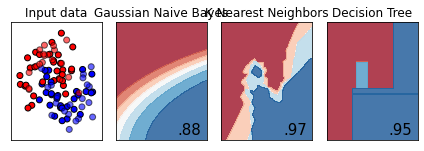

In [76]:
# Set up graph
h = 0.02
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(2, len(algorithm_space) + 1, 1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Input data")
# Draw subplots
for i, name in enumerate(algorithm_space):
    ax = plt.subplot(2, len(algorithm_space) + 1, i+2)
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # see-classify
    clf = algorithm_space[name]()
    [Z, score] = clf.evaluate(dataset)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    
    # Print fitness score
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


plt.tight_layout()
